# MAGMA experimnetations

## Artificial data : Different HP + Common grid

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from MAGMAfixed import MAGMA

### Exponentied Quadratic Kernel

In [107]:
N = 100
M = 20

t0 = 0
tN = 10 + 1e-3

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(100,)


In [108]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
m0_function = lambda t : a * t + b
print(m0.shape)

(100,)


In [109]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[86.30003294  3.54914676]


In [110]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(100, 100)


In [111]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(100,)


In [112]:
Theta = np.array([np.random.uniform(1, np.exp(5), size=M), np.random.uniform(1, np.exp(2), size=M)]).T
Sigma = np.random.uniform(0, 1, size=M)

print(Theta)
print(Sigma)

[[104.50642754   1.46415344]
 [ 88.84097398   5.47598455]
 [ 86.15507592   3.18203593]
 [ 82.48779219   6.45013142]
 [ 73.36947941   4.09309416]
 [ 52.14155253   1.04458742]
 [  4.36544761   6.02687488]
 [ 25.59608505   1.43848336]
 [ 28.12524161   2.97092065]
 [ 93.1938497    5.04334915]
 [ 94.2565652    1.26194594]
 [ 54.5633104    6.21659024]
 [ 19.90009346   3.75522289]
 [128.59735879   1.32753685]
 [ 61.42232      5.10416557]
 [ 11.91134095   6.79616873]
 [ 78.8811577    1.79053433]
 [ 93.25534699   5.70458149]
 [ 78.31850311   3.09053588]
 [ 86.51090548   3.15604213]]
[0.00666803 0.86890806 0.49162878 0.00144236 0.43651581 0.13928082
 0.23517333 0.92862584 0.01681723 0.76438264 0.02790433 0.03919767
 0.50543238 0.61652018 0.56695464 0.5537389  0.45324648 0.79393095
 0.00798014 0.96667938]


In [113]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta[i], common_T)
    Psi_Theta_Sigma = C_Theta + Sigma[i] * np.identity(N)
    Yi = np.random.multivariate_normal(mu0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(20, 100)


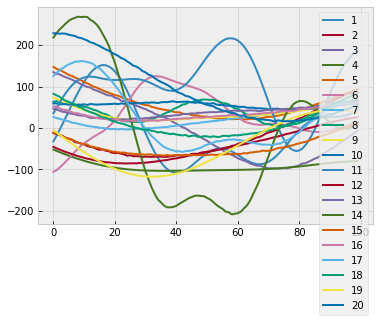

In [114]:
for i in range(M):
    plt.plot(Y[i], label=f"{i + 1}")
plt.legend()
plt.show()

In [115]:
model = MAGMA(
    T=None,
    Y=Y,
    common_T=common_T,
    m0=np.zeros(len(m0)), 
    m0_function=m0_function,
    theta0=np.array([np.random.uniform(0.99,1.01), np.random.uniform(0.99,1.01)]), 
    Theta=np.array([np.random.uniform(0.99,1.01, size=M), np.random.uniform(0.99,1.01, size=M)]).T, 
    Sigma=np.random.uniform(0.49, 0.51, size=M),
    common_hp_flag=False,
    common_grid_flag=True,
    save_history_flag=True,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [116]:
model.fit(max_iterations=1, eps=-np.inf)

MAGMA Training:   0%|          | 0/1 [00:00<?, ?it/s]

theta0
Theta & Sigma 0
Theta & Sigma 1
Theta & Sigma 2
Theta & Sigma 3
Theta & Sigma 4
Theta & Sigma 5
Theta & Sigma 6
Theta & Sigma 7
Theta & Sigma 8
Theta & Sigma 9
Theta & Sigma 10
Theta & Sigma 11
Theta & Sigma 12
Theta & Sigma 13
Theta & Sigma 14
Theta & Sigma 15
Theta & Sigma 16
Theta & Sigma 17
Theta & Sigma 18
Theta & Sigma 19


MAGMA Training: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


In [117]:
model.scipy_optimize_display = False
model.fit(max_iterations=49, eps=1e-2)

MAGMA Training:  76%|███████▌  | 37/49 [00:40<00:13,  1.10s/it]


In [118]:
history = model.history
len(history)

40

In [119]:
LL_theta0 = []
LL_Theta_Sigma = []

for epoch_history in history[1:]:
    LL_theta0.append(epoch_history["LL_theta0"])
    LL_Theta_Sigma.append(epoch_history["LL_Theta_Sigma"])

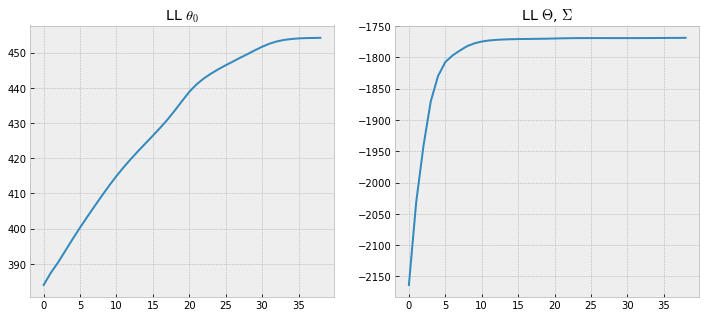

In [120]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LL_theta0)
plt.title("LL $\\theta_0$")
plt.subplot(1, 2, 2)
plt.plot(LL_Theta_Sigma)
plt.title("LL $\Theta$, $\Sigma$")
plt.show()

In [121]:
Sigma_estim = []
for epoch_history in history:
    Sigma_estim.append(epoch_history["Sigma"])
Sigma_estim = np.array(Sigma_estim)
print(model.Sigma)
print(Sigma)

[-0.07643311  0.87053648  0.73577848 -0.03462903  0.59436625  0.33373295
  0.44635467  0.91379227 -0.11892153  0.75126617 -0.15982892 -0.1763864
  0.74050826 -0.81341163  0.71590004  0.73425946  0.64473917  0.85973071
 -0.09512039  0.9648538 ]
[0.00666803 0.86890806 0.49162878 0.00144236 0.43651581 0.13928082
 0.23517333 0.92862584 0.01681723 0.76438264 0.02790433 0.03919767
 0.50543238 0.61652018 0.56695464 0.5537389  0.45324648 0.79393095
 0.00798014 0.96667938]


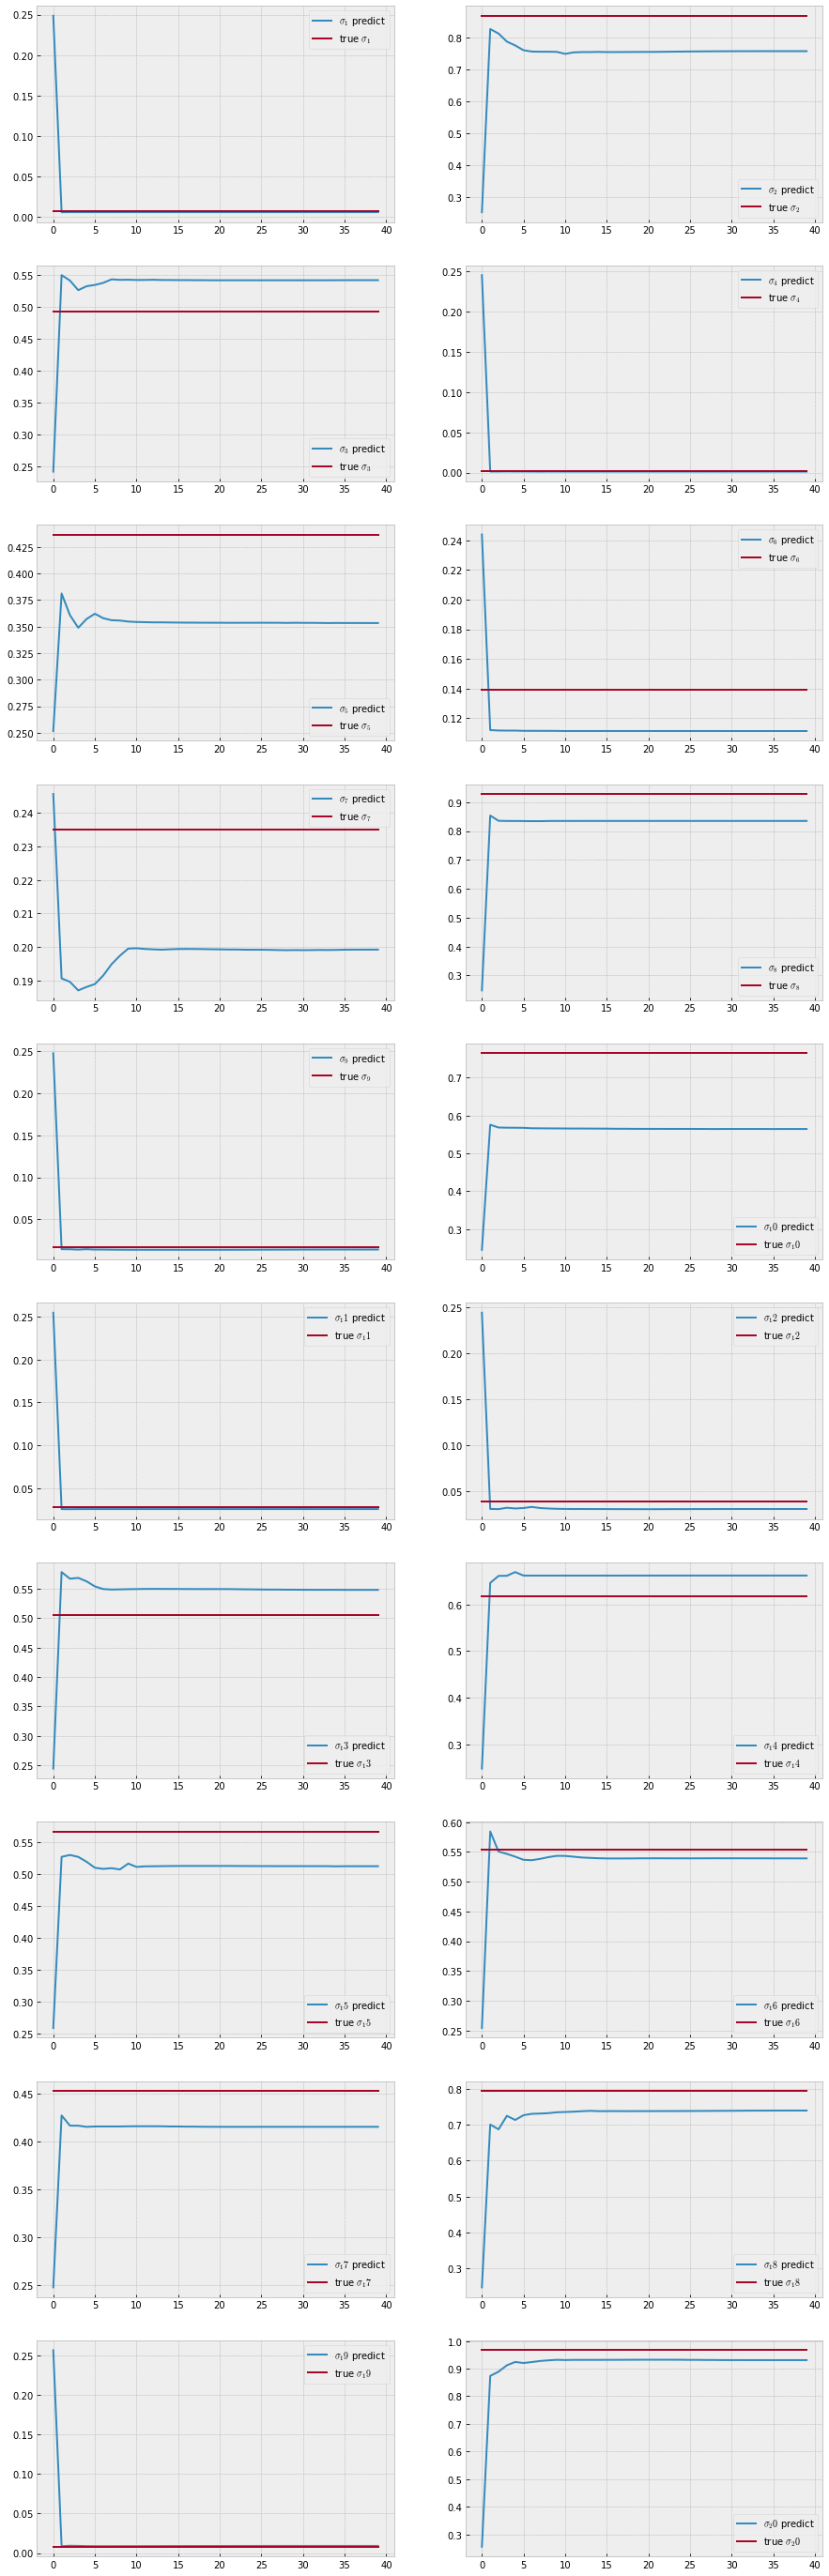

In [122]:
plt.figure(figsize=(15, int(np.ceil(M/2)) * 5))
for i in range(1, M + 1):
    plt.subplot(int(np.ceil(M/2)), 2, i)
    plt.plot(Sigma_estim[:, i - 1]**2, label=f"$\sigma_{i}$ predict")
    plt.plot(Sigma[i-1]*np.ones(len(Sigma_estim[:, i - 1])),label=f"true $\sigma_{i}$")
    plt.legend()
plt.show()

In [123]:
m0_estim_norms = []
for epoch_history in history[1:]:
    m0_estim_norms.append(np.linalg.norm(epoch_history["m0"]))

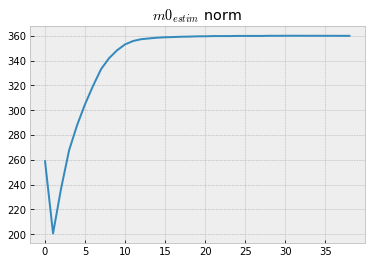

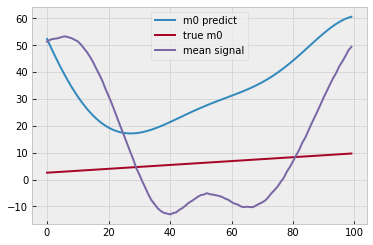

In [124]:
plt.plot(m0_estim_norms)
plt.title("$m0_{estim}$ norm")
plt.show()
plt.plot(history[-1]["m0"],label="m0 predict")
plt.plot(m0,label = "true m0")
plt.plot(Y.mean(axis=0),label = "mean signal")
plt.legend()
plt.show()

In [125]:
theta0_estim = []
for epoch_history in history:
    theta0_estim.append(epoch_history["theta0"])
theta0_estim = np.array(theta0_estim)
print(model.theta0)
print(theta0)

[64.58140921  3.52248505]
[86.30003294  3.54914676]


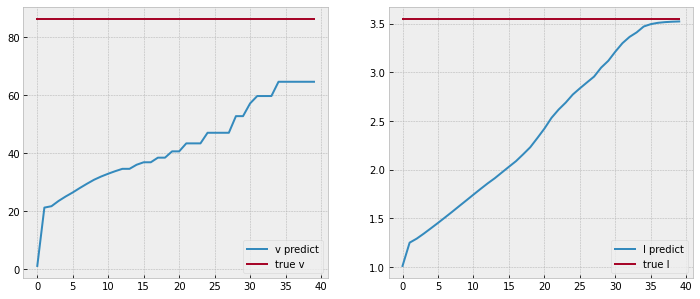

In [126]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0_estim[:, 0], label="v predict")
plt.plot(theta0[0]*np.ones(len(theta0_estim[:, 0])), label="true v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(theta0_estim[:, 1], label="l predict")
plt.plot(theta0[1]*np.ones(len(theta0_estim[:, 0])), label="true l")
plt.legend()
plt.show()

In [127]:
Theta_estim = []
for epoch_history in history:
    Theta_estim.append(epoch_history["Theta"])
Theta_estim = np.array(Theta_estim)
print(Theta.shape)
print(model.Theta)
print(Theta)

(20, 2)
[[129.39601563   1.53703191]
 [ 71.32964727   5.16778564]
 [ 67.1538956    3.19700704]
 [ 94.10754727   7.02995838]
 [ 72.06947658   5.07173399]
 [ 68.36190638   1.10002516]
 [ 16.86002415   7.86161289]
 [ 26.96325924   1.52488309]
 [ 11.88208483   2.66848072]
 [ 18.58553164   1.86530505]
 [118.90008145   1.27134972]
 [ 53.58973744   6.66019908]
 [  7.93524963   3.32927392]
 [159.88105964   1.36235984]
 [ 50.55047043   4.70375121]
 [  0.92474814   6.28722056]
 [ 95.03184823   1.83651729]
 [ 58.00553454   4.97025771]
 [ 65.18085889   3.08892895]
 [112.97427552   3.51748035]]
[[104.50642754   1.46415344]
 [ 88.84097398   5.47598455]
 [ 86.15507592   3.18203593]
 [ 82.48779219   6.45013142]
 [ 73.36947941   4.09309416]
 [ 52.14155253   1.04458742]
 [  4.36544761   6.02687488]
 [ 25.59608505   1.43848336]
 [ 28.12524161   2.97092065]
 [ 93.1938497    5.04334915]
 [ 94.2565652    1.26194594]
 [ 54.5633104    6.21659024]
 [ 19.90009346   3.75522289]
 [128.59735879   1.32753685]
 [ 61

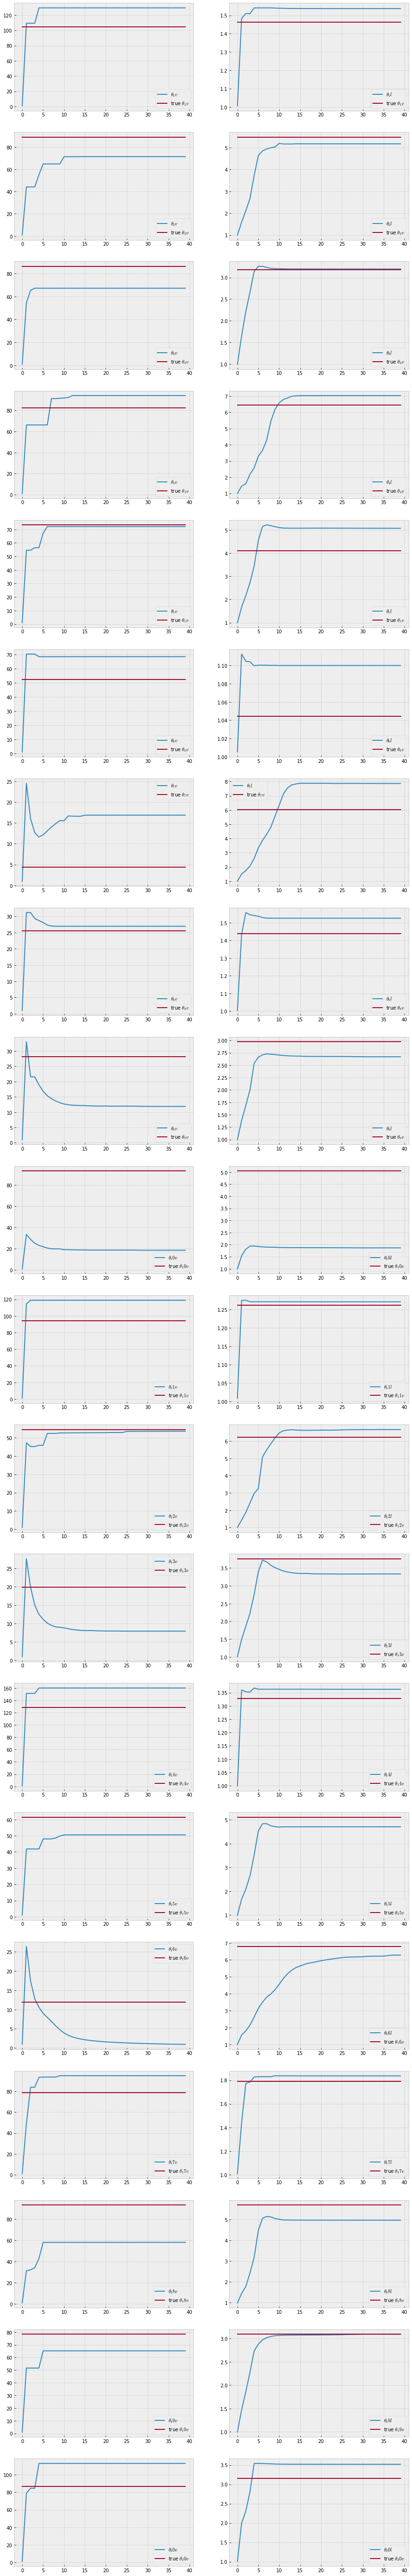

In [128]:
plt.figure(figsize=(15, M * 5))
cpt = 0
for i in range(1, M + 1):
    cpt += 1
    plt.subplot(M, 2, cpt)
    plt.plot(Theta_estim[:, i - 1, 0], label=f"$\\theta_{i} v$")
    plt.plot(Theta[i-1,0]*np.ones(len(theta0_estim[:, 0])), label=f"true $\\theta_{i} v$")
    plt.legend()
    cpt += 1
    plt.subplot(M, 2, cpt)
    plt.plot(Theta_estim[:, i - 1, 1], label=f"$\\theta_{i} l$")
    plt.plot(Theta[i-1,1]*np.ones(len(theta0_estim[:, 0])), label=f"true $\\theta_{i} v$")
    plt.legend()
plt.show()